<a href="https://colab.research.google.com/github/NabilahSharfina/Ruangguru-Bootcamp/blob/main/Product_Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load data from google

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Read Data

In [13]:
inv_items = pd.read_csv('/content/drive/MyDrive/KAMPUS MERDEKA BATCH 2/Project Ruang Guru Kel 255/Dataset Final Project DBA/inventory_items.csv')
inv_items.head()

,id,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id
0,90967,16898,2021-07-19 02:20:10+00:00,2021-07-20 14:34:10+00:00,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.0,Men,22811EE19846217512507785E74D12CC,3
1,90968,16898,2020-04-13 07:46:00+00:00,NaN,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.0,Men,22811EE19846217512507785E74D12CC,3
2,90969,16898,2020-09-02 17:43:00+00:00,NaN,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.0,Men,22811EE19846217512507785E74D12CC,3
3,90970,16898,2021-08-19 15:17:00+00:00,NaN,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.0,Men,22811EE19846217512507785E74D12CC,3
4,96715,16898,2020-05-09 11:16:10+00:00,2020-06-23 23:59:10+00:00,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.0,Men,22811EE19846217512507785E74D12CC,3


In [4]:
products = pd.read_csv('/content/drive/MyDrive/KAMPUS MERDEKA BATCH 2/Project Ruang Guru Kel 255/Dataset Final Project DBA/products.csv')
products.head()

,id,cost,category,name,brand,retail_price,department,sku,distribution_center_id
0,27569,92.652563,Swim,2XU Men's Swimmers Compression Long Sleeve Top,2XU,150.410004,Men,B23C5765E165D83AA924FA8F13C05F25,1
1,27445,24.719661,Swim,TYR Sport Men's Square Leg Short Swim Suit,TYR,38.990002,Men,2AB7D3B23574C3DEA2BD278AFD0939AB,1
2,27457,15.897600,Swim,TYR Sport Men's Solid Durafast Jammer Swim Suit,TYR,27.600000,Men,8F831227B0EB6C6D09A0555531365933,1
3,27466,17.850000,Swim,TYR Sport Men's Swim Short/Resistance Short Sw...,TYR,30.000000,Men,67317D6DCC4CB778AEB9219565F5456B,1
4,27481,29.408001,Swim,TYR Alliance Team Splice Jammer,TYR,45.950001,Men,213C888198806EF1A0E2BBF2F4855C6C,1


In [5]:
inv_items.shape

(487394, 12)

In [6]:
products.shape

(29120, 9)

# 2. Data Exploration

In [28]:
inv_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487394 entries, 0 to 487393
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              487394 non-null  int64  
 1   product_id                      487394 non-null  int64  
 2   created_at                      487394 non-null  object 
 3   sold_at                         180508 non-null  object 
 4   cost                            487394 non-null  float64
 5   product_category                487394 non-null  object 
 6   product_name                    487359 non-null  object 
 7   product_brand                   487020 non-null  object 
 8   product_retail_price            487394 non-null  float64
 9   product_department              487394 non-null  object 
 10  product_sku                     487394 non-null  object 
 11  product_distribution_center_id  487394 non-null  int64  
dtypes: float64(2), i

**Keterangan:**
1. Dataframe memiliki total 487.394 baris dan 12 kolom.
2. Dataframe masih memiliki *null values* di kolom `sold_at`.
3. Target klasifikasi adalah kolom `product_distribution_center_id` dengan tipe data `int64`
4. Berarti sisanya adalah *feature* (predictor)

Dari informasi di atas, bisa dikelompokkan kolom kategorical dan numerical sebagai berikut:

In [ ]:
# Kelompok categorical & numerical
inv_cats = ['created_at', 'sold_at', 'product_category', 'product_name', 'product_brand', 'product_department', 'product_sku']
inv_nums = ['id', 'product_id', 'cost', 'product_retail_price', 'product_distribution_center_id']

In [29]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29120 entries, 0 to 29119
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      29120 non-null  int64  
 1   cost                    29120 non-null  float64
 2   category                29120 non-null  object 
 3   name                    29118 non-null  object 
 4   brand                   29096 non-null  object 
 5   retail_price            29120 non-null  float64
 6   department              29120 non-null  object 
 7   sku                     29120 non-null  object 
 8   distribution_center_id  29120 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [9]:
inv_items.columns

Index(['id', 'product_id', 'created_at', 'sold_at', 'cost', 'product_category',
       'product_name', 'product_brand', 'product_retail_price',
       'product_department', 'product_sku', 'product_distribution_center_id'],
      dtype='object')

In [10]:
products.columns

Index(['id', 'cost', 'category', 'name', 'brand', 'retail_price', 'department',
       'sku', 'distribution_center_id'],
      dtype='object')

In [90]:
products.rename(columns={"id":"product_id"})

,product_id,cost,category,name,brand,retail_price,department,sku,distribution_center_id
0,27569,92.652563,Swim,2XU Men's Swimmers Compression Long Sleeve Top,2XU,150.410004,Men,B23C5765E165D83AA924FA8F13C05F25,1
1,27445,24.719661,Swim,TYR Sport Men's Square Leg Short Swim Suit,TYR,38.990002,Men,2AB7D3B23574C3DEA2BD278AFD0939AB,1
2,27457,15.897600,Swim,TYR Sport Men's Solid Durafast Jammer Swim Suit,TYR,27.600000,Men,8F831227B0EB6C6D09A0555531365933,1
3,27466,17.850000,Swim,TYR Sport Men's Swim Short/Resistance Short Sw...,TYR,30.000000,Men,67317D6DCC4CB778AEB9219565F5456B,1
4,27481,29.408001,Swim,TYR Alliance Team Splice Jammer,TYR,45.950001,Men,213C888198806EF1A0E2BBF2F4855C6C,1
...,...,...,...,...,...,...,...,...,...
29115,1993,22.150999,Fashion Hoodies & Sweatshirts,Comfort Colors C1598 Womens Full-Zip Hooded Fl...,Comfort Colors,52.119999,Women,C5A4E7E6882845EA7BB4D9462868219B,10
29116,2062,18.973360,Fashion Hoodies & Sweatshirts,Comfort Colors Pigment-Dyed Ladies Full-Zip Ho...,Comfort Colors,39.860001,Women,2D405B367158E3F12D7C1E31A96B3AF3,10
29117,2308,9.028020,Fashion Hoodies & Sweatshirts,Comfort Colors by Chouinard Women's Drawstring...,Comfort Colors,18.020000,Women,E58AEA67B01FA747687F038DFDE066F6,10
29118,1852,17.674240,Fashion Hoodies & Sweatshirts,DV by Dolce Vita Women's Larisa Hooded Sweatshirt,DV by Dolce Vita,34.520000,Women,EB1E78328C46506B46A4AC4A1E378B91,10


In [91]:
group_id = products.groupby(['id']).count().reset_index()
group_id
group_product = group_id.rename(columns={"id":"product_id"})
group_product

,product_id,cost,category,name,brand,retail_price,department,sku,distribution_center_id
0,1,1,1,1,1,1,1,1,1
1,2,1,1,1,1,1,1,1,1
2,3,1,1,1,1,1,1,1,1
3,4,1,1,1,1,1,1,1,1
4,5,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
29115,29116,1,1,1,1,1,1,1,1
29116,29117,1,1,1,1,1,1,1,1
29117,29118,1,1,1,1,1,1,1,1
29118,29119,1,1,1,1,1,1,1,1


In [92]:
group_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29120 entries, 0 to 29119
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   product_id              29120 non-null  int64
 1   cost                    29120 non-null  int64
 2   category                29120 non-null  int64
 3   name                    29120 non-null  int64
 4   brand                   29120 non-null  int64
 5   retail_price            29120 non-null  int64
 6   department              29120 non-null  int64
 7   sku                     29120 non-null  int64
 8   distribution_center_id  29120 non-null  int64
dtypes: int64(9)
memory usage: 2.0 MB


In [93]:
# Fungsi Inner Join
df_join = pd.merge(inv_items, group_product, on='product_id', how='inner')

In [94]:
df_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 487394 entries, 0 to 487393
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              487394 non-null  int64  
 1   product_id                      487394 non-null  int64  
 2   created_at                      487394 non-null  object 
 3   sold_at                         180508 non-null  object 
 4   cost_x                          487394 non-null  float64
 5   product_category                487394 non-null  object 
 6   product_name                    487359 non-null  object 
 7   product_brand                   487020 non-null  object 
 8   product_retail_price            487394 non-null  float64
 9   product_department              487394 non-null  object 
 10  product_sku                     487394 non-null  object 
 11  product_distribution_center_id  487394 non-null  int64  
 12  cost_y          

In [95]:
df_join.dropna(subset=['sold_at'], inplace=True)
df_join['date_sold'] = df_join['sold_at'].apply(lambda x : x[:10])

df_join_series = pd.DataFrame(df_join[df_join['product_category'] == 'Outerwear & Coats'].groupby('date_sold').count()['id'])

df_join_series_new = df_join_series[-150:]
df_join_series_new = df_join_series_new.reset_index()

# Set type object to type datetime
df_join_series_new['date_sold'] = pd.to_datetime(df_join_series_new['date_sold'])
df_join_series_new

,date_sold,id
0,2022-01-08,12
1,2022-01-09,14
2,2022-01-10,19
3,2022-01-11,19
4,2022-01-12,16
...,...,...
145,2022-06-02,61
146,2022-06-03,24
147,2022-06-04,21
148,2022-06-05,8


In [116]:
df_join_series_new.to_excel('join_data.xlsx')

In [98]:
# Summary statistics pada variabel 
print (df_join_series_new.describe().T)
print ('\n--------------------')

# Pembulatan decimal 2 angka di belakang koma
print(df_join_series_new.describe().T.round(2))

    count       mean        std  min   25%   50%    75%   max
id  150.0  22.853333  10.982223  2.0  16.0  22.0  26.75  97.0

--------------------
    count   mean    std  min   25%   50%    75%   max
id  150.0  22.85  10.98  2.0  16.0  22.0  26.75  97.0


# 3. Data Analysis

In [5]:
data1 = pd.read_csv('/content/drive/MyDrive/KAMPUS MERDEKA BATCH 2/Project Ruang Guru Kel 255/Dataset Final Project DBA/inventory_items.csv', index_col='sold_at', parse_dates=True)
data1 = data1.dropna()
print('Shape of data', data1.shape)
data1.head()

Shape of data (486985, 11)


,id,product_id,created_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id
sold_at,,,,,,,,,,,
2021-05-16 09:58:33+00:00,187928,10250,2021-05-16 01:23:33+00:00,26.90235,Sleep & Lounge,Hatley Labs On Plaid Flannel Nightdress,H,46.950001,Women,183F50A7700982A3ED18FF6D7A5777BF,8
NaT,187929,10250,2021-12-10 18:49:00+00:00,26.90235,Sleep & Lounge,Hatley Labs On Plaid Flannel Nightdress,H,46.950001,Women,183F50A7700982A3ED18FF6D7A5777BF,8
2022-01-29 15:27:14+00:00,211526,10250,2022-01-06 14:56:14+00:00,26.90235,Sleep & Lounge,Hatley Labs On Plaid Flannel Nightdress,H,46.950001,Women,183F50A7700982A3ED18FF6D7A5777BF,8
NaT,211527,10250,2020-08-04 03:41:00+00:00,26.90235,Sleep & Lounge,Hatley Labs On Plaid Flannel Nightdress,H,46.950001,Women,183F50A7700982A3ED18FF6D7A5777BF,8
NaT,211528,10250,2020-10-05 17:42:00+00:00,26.90235,Sleep & Lounge,Hatley Labs On Plaid Flannel Nightdress,H,46.950001,Women,183F50A7700982A3ED18FF6D7A5777BF,8


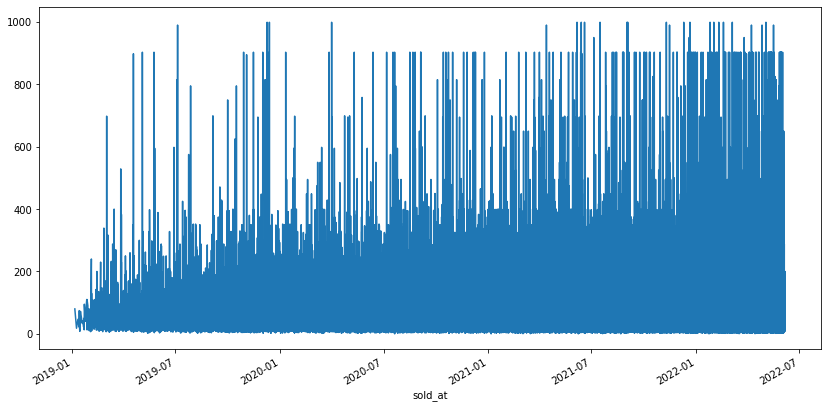

In [6]:
data1['product_retail_price'].plot(figsize=(14, 7))

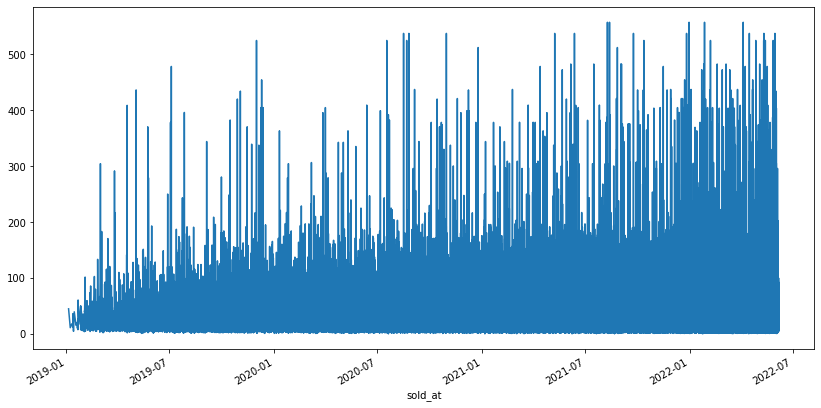

In [7]:
data1['cost'].plot(figsize=(14, 7))

In [10]:
series = data1['product_retail_price'].values
series

array([46.95000076, 46.95000076, 46.95000076, ..., 35.72000122,
       35.72000122, 35.72000122])

In [9]:
series = data1['cost'].values
series

array([26.90235047, 26.90235047, 26.90235047, ..., 15.75252059,
       15.75252059, 15.75252059])

In [ ]:
from statsmodels.tsa.stattools import adfuller

# ADF Test
result = adfuller(series, autolag='AIC')

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

In [15]:
# fit an ARIMA model and plot residual errors
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot

# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('/content/drive/MyDrive/KAMPUS MERDEKA BATCH 2/Project Ruang Guru Kel 255/Dataset Final Project DBA/inventory_items.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
series.index = series.index.to_period('M')
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


ModuleNotFoundError: ignored